In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('Coffee Shop Sales.csv', encoding= 'unicode_escape')

In [12]:
df.shape

(100, 12)

In [14]:
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,Price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,200,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/2/2023,7:08:56,2,5,Lower Manhattan,57,3.1,100,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/3/2023,7:14:04,2,5,Lower Manhattan,59,4.5,150,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/4/2023,7:20:24,1,5,Lower Manhattan,22,2.0,300,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/5/2023,7:22:41,2,5,Lower Manhattan,57,3.1,100,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [16]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    100 non-null    int64  
 1   transaction_date  100 non-null    object 
 2   transaction_time  100 non-null    object 
 3   transaction_qty   100 non-null    int64  
 4   store_id          100 non-null    int64  
 5   store_location    100 non-null    object 
 6   product_id        100 non-null    int64  
 7   unit_price        100 non-null    float64
 8   Price             100 non-null    int64  
 9   product_category  100 non-null    object 
 10  product_type      100 non-null    object 
 11  product_detail    100 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 9.5+ KB


In [22]:
df.drop(['unit_price'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    100 non-null    int64 
 1   transaction_date  100 non-null    object
 2   transaction_time  100 non-null    object
 3   transaction_qty   100 non-null    int64 
 4   store_id          100 non-null    int64 
 5   store_location    100 non-null    object
 6   product_id        100 non-null    int64 
 7   Price             100 non-null    int64 
 8   product_category  100 non-null    object
 9   product_type      100 non-null    object
 10  product_detail    100 non-null    object
dtypes: int64(5), object(6)
memory usage: 8.7+ KB


In [24]:
pd.isnull(df)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,Price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [25]:
pd.isnull(df).sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
Price               0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [27]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id', 'Price',
       'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [33]:
df.rename(columns={'Price':'product price'}, inplace=True)

In [36]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,product price
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,1.440000,6.11000,47.350000,176.000000
std,29.011492,0.498888,1.45571,16.103438,67.972068
min,1.000000,1.000000,5.00000,22.000000,100.000000
25%,25.750000,1.000000,5.00000,35.750000,100.000000
50%,50.500000,1.000000,5.00000,45.000000,200.000000
75%,75.250000,2.000000,8.00000,57.250000,200.000000
max,100.000000,2.000000,8.00000,87.000000,300.000000


In [69]:
df[['transaction_date']].describe()

,transaction_date
count,100
unique,100
top,1/1/2023
freq,1


In [70]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [73]:
df['transaction_date'] = pd.to_numeric(df['transaction_date'], errors='coerce')


In [76]:
# Ensure 'transaction_date' is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Ensure 'Total' column contains numeric values
df['Total'] = pd.to_numeric(df['transaction_date'], errors='coerce')

# Now perform the groupby operation
average_sale_per_transaction = df.groupby('transaction_date').agg({'Total': 'mean'}).reset_index()


In [77]:
import pandas as pd

# Sample DataFrame
data = {'transaction_date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
        'Total': [100, 150, 200, 250]}

df = pd.DataFrame(data)

# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Group by transaction_date and get the average (mean) of 'Total'
average_sale_per_transaction = df.groupby('transaction_date').agg({'Total': 'mean'}).reset_index()

print(average_sale_per_transaction)


  transaction_date  Total
0       2023-01-01  125.0
1       2023-01-02  225.0


In [39]:
df[['product price']].describe()

,product price
count,100.000000
mean,176.000000
std,67.972068
min,100.000000
25%,100.000000
50%,200.000000
75%,200.000000
max,300.000000


# EXPLORATORY DATA ANALYSIS 

### product_category 

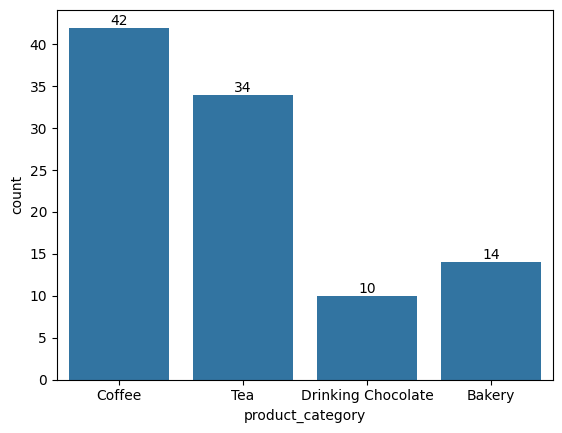

In [64]:
ax = sns.countplot(x='product_category', data=df)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)
